In [86]:
subject_ids = [13095, 14037, 14051, 14069, 15033, 15035, 15055]

In [87]:
from pystain import StainCluster, StainDataset

In [88]:
import h5py

In [89]:
import statsmodels.api as sm

T1    -1.795080e-14
T2*   -8.252374e-12
QSM    3.138858e-14
dtype: float64

/home/gdholla1/data/post_mortem/new_data_format/13095/images.hdf5
CALR
FER
GABRA3
GAD6567
MBP
PARV
SERT
SMI32
SYN
TH
TRANSF
VGLUT1
/home/gdholla1/data/post_mortem/new_data_format/14037/images.hdf5
CALR
FER
GABRA3
GAD6567
MBP
PARV
SERT
SMI32
SYN
TH
TRANSF
VGLUT1
/home/gdholla1/data/post_mortem/new_data_format/14051/images.hdf5
CALR
FER
GABRA3
GAD6567
MBP
PARV
SERT
SMI32
SYN
TH
TRANSF
VGLUT1
/home/gdholla1/data/post_mortem/new_data_format/14069/images.hdf5
CALR
FER
GABRA3
GAD6567
MBP
PARV
SERT
SMI32
SYN
TH
TRANSF
VGLUT1
/home/gdholla1/data/post_mortem/new_data_format/15033/images.hdf5
CALR
FER
GABRA3
GAD6567
MBP
PARV
SERT
SMI32
SYN
TH
TRANSF
VGLUT1
/home/gdholla1/data/post_mortem/new_data_format/15035/images.hdf5
CALR
FER
GABRA3
GAD6567
MBP
PARV
SERT
SMI32
SYN
TH
TRANSF
VGLUT1
/home/gdholla1/data/post_mortem/new_data_format/15055/images.hdf5
CALR
FER
GABRA3
GAD6567
MBP
PARV
SERT
SMI32
SYN
TH
TRANSF
VGLUT1


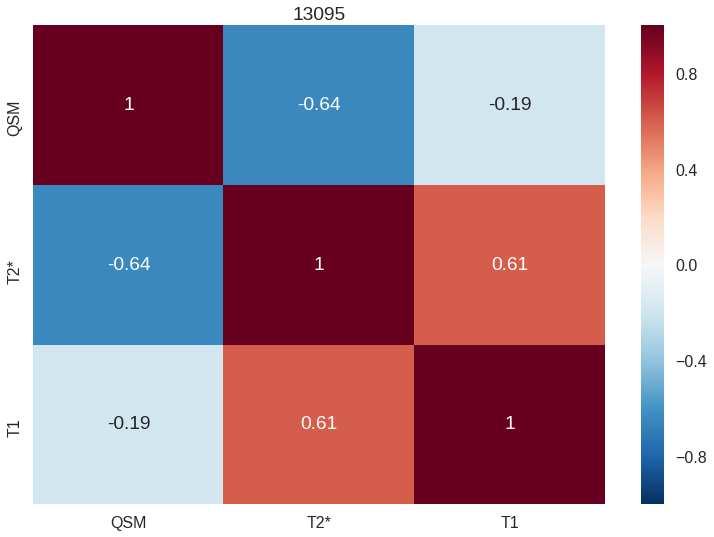

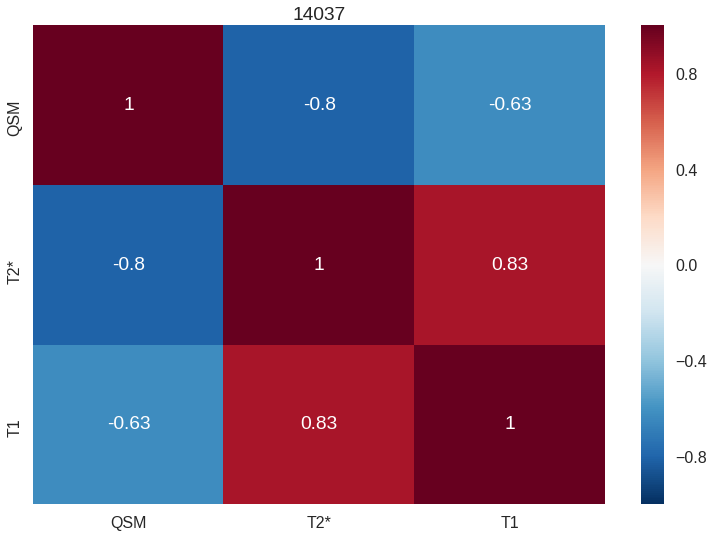

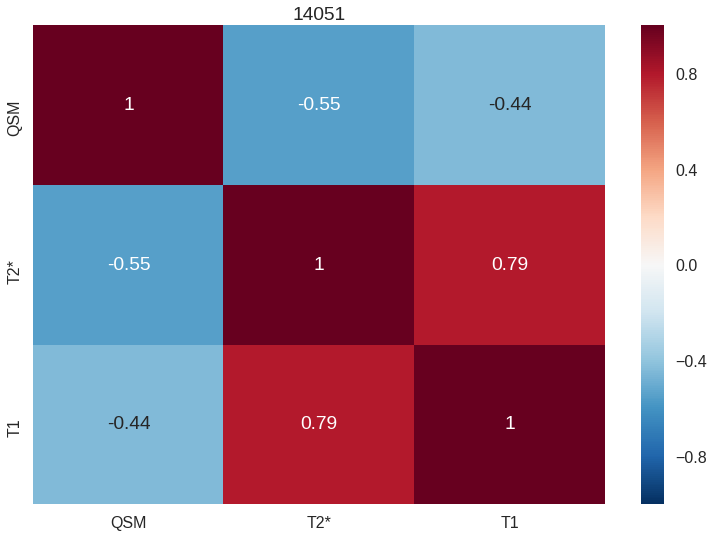

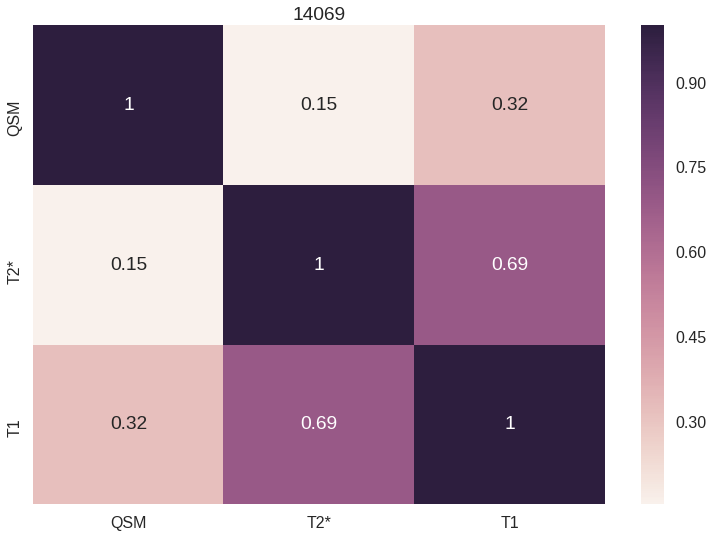

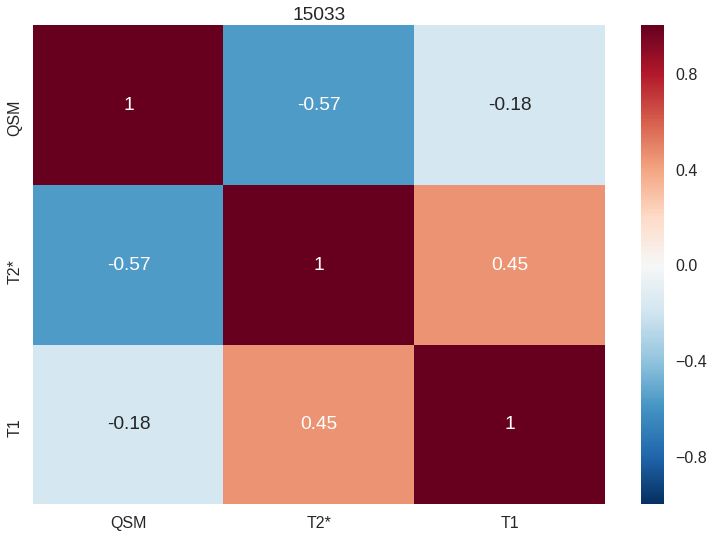

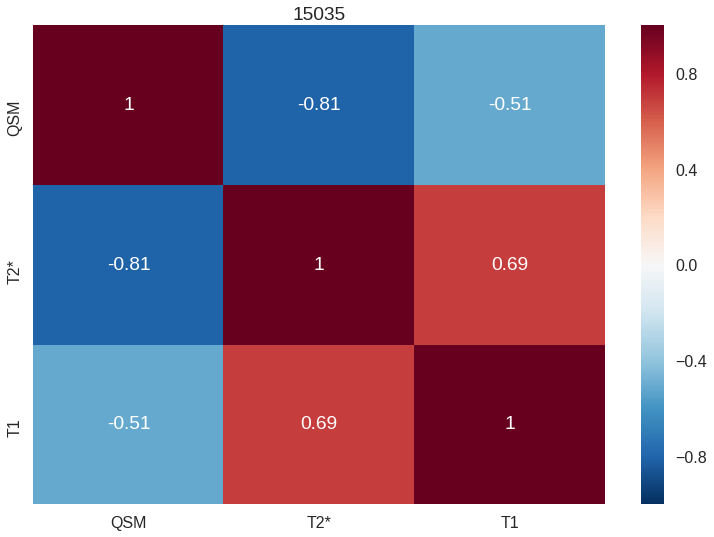

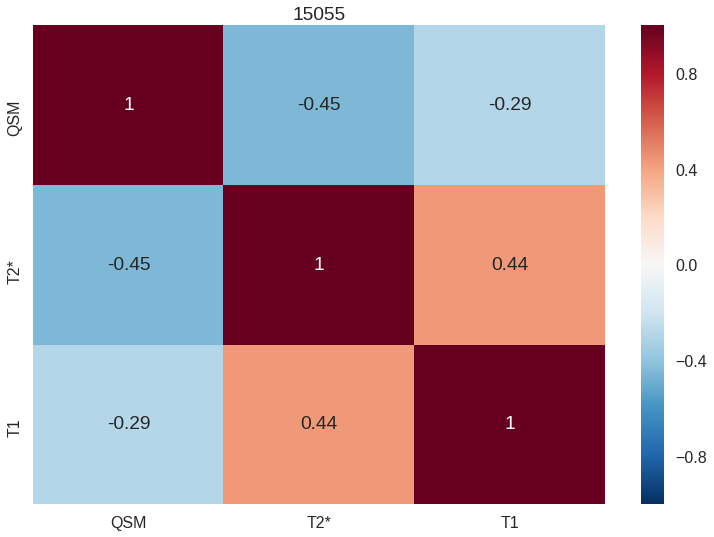

In [135]:
r = []

for subject_id in subject_ids[:]:
    ds = StainDataset(subject_id, fwhm=0.3)
#         ds.smoothed_dataframe['T2 weighted'] = ds.h5file['mri_in_stain_space'][ds.thresholded_mask]
    ds.smoothed_dataframe['T1'] = ds.h5file['T1_in_stain_space'][ds.thresholded_mask] / 1000.
    ds.smoothed_dataframe['R1'] = 1./(ds.h5file['T1_in_stain_space'][ds.thresholded_mask] / 1000.)
    
    ds.smoothed_dataframe['T2*'] = ds.h5file['T2star_in_stain_space'][ds.thresholded_mask]
    ds.smoothed_dataframe['R2*'] = 1./ds.h5file['T2star_in_stain_space'][ds.thresholded_mask]    
    
    ds.smoothed_dataframe['QSM'] = ds.h5file['QSM_in_stain_space'][ds.thresholded_mask]
    
    plt.figure()
    sns.heatmap(ds.smoothed_dataframe.corr().ix[['QSM', 'T2*', 'T1'], ['QSM', 'T2*', 'T1']], annot=True)
    plt.title(subject_id)

    # Filter out weird values
    


    for stain in ds.stains:
        print stain
        
        idx = (ds.smoothed_dataframe['QSM'] != 0) & (~ds.smoothed_dataframe[stain].isnull())
        
       
        
#         idx = (ds.smoothed_dataframe['QSM'] != 0) & (~ds.smoothed_dataframe[stain].isnull())
        
#         X = ds.smoothed_dataframe.ix[idx, ['T1', 'T2*', 'QSM']]
#         X -= X.mean(0)
        
#         tmp = ds.smoothed_dataframe.ix[idx, stain] / ds.smoothed_dataframe.ix[idx, stain].max()
#         tmp -= tmp.mean()
        
#         fit = sm.OLS(tmp, X).fit()
#         pars = fit.params.to_dict()        
#         pars.update({'stain':stain, 'subj_idx':subject_id, 'model':'multivariate - no intercept', 'R2':fit.rsquared, 'R2 adjusted':fit.rsquared_adj})
#         r.append(pars)        
        
        
        X = ds.smoothed_dataframe[['T1']]
        X = sm.add_constant(X) 
        fit = sm.OLS(ds.smoothed_dataframe[stain] / ds.smoothed_dataframe[stain].max(), X).fit()
        pars = fit.params.to_dict()        
        pars.update({'stain':stain, 'subj_idx':subject_id, 'model':'univariate T1', 'R2':fit.rsquared, 'R2 adjusted':fit.rsquared_adj})
        r.append(pars)
        
        X = ds.smoothed_dataframe[['T2*']]
        X = sm.add_constant(X) 
        
        fit = sm.OLS(ds.smoothed_dataframe[stain] / ds.smoothed_dataframe[stain].max(), X).fit()
        pars = fit.params.to_dict()        
        pars.update({'stain':stain, 'subj_idx':subject_id, 'model':'univariate T2*', 'R2':fit.rsquared, 'R2 adjusted':fit.rsquared_adj})
        r.append(pars)
        
        
        X = ds.smoothed_dataframe.ix[idx, ['QSM']]
        X = sm.add_constant(X) 
        
        fit = sm.OLS(ds.smoothed_dataframe.ix[idx, stain] / ds.smoothed_dataframe.ix[idx, stain].max(), X).fit()
        pars = fit.params.to_dict()        
        pars.update({'stain':stain, 'subj_idx':subject_id, 'model':'univariate QSM', 'R2':fit.rsquared, 'R2 adjusted':fit.rsquared_adj})
        
        r.append(pars)                
        
        X = ds.smoothed_dataframe[['T1', 'T2*']]
        X = sm.add_constant(X) 
        
        fit = sm.OLS(ds.smoothed_dataframe[stain] / ds.smoothed_dataframe[stain].max(), X).fit()
        pars = fit.params.to_dict()        
        pars.update({'stain':stain, 'subj_idx':subject_id, 'model':'T1 + T2*', 'R2':fit.rsquared, 'R2 adjusted':fit.rsquared_adj})
        
        r.append(pars)                        
        
        
        X = ds.smoothed_dataframe.ix[idx, ['T1', 'QSM']]
        X = sm.add_constant(X) 
        
        fit = sm.OLS(ds.smoothed_dataframe.ix[idx, stain] / ds.smoothed_dataframe.ix[idx, stain].max(), X).fit()
        pars = fit.params.to_dict()        
        pars.update({'stain':stain, 'subj_idx':subject_id, 'model':'T1 + QSM', 'R2':fit.rsquared, 'R2 adjusted':fit.rsquared_adj})
        
        r.append(pars)                
        
        
        X = ds.smoothed_dataframe.ix[idx, ['T1', 'T2*', 'QSM']]
        X = sm.add_constant(X)    
        fit = sm.OLS(ds.smoothed_dataframe.ix[idx, stain] / ds.smoothed_dataframe.ix[idx, stain].max(), X).fit()
        pars = fit.params.to_dict()        
        pars.update({'stain':stain, 'subj_idx':subject_id, 'model':'T1+T2*+QSM', 'R2':fit.rsquared, 'R2 adjusted':fit.rsquared_adj})
        r.append(pars)        


In [127]:
import pandas

In [128]:
df = pandas.DataFrame(r)

In [129]:
sns.set_context('poster')
sns.set_style('whitegrid')

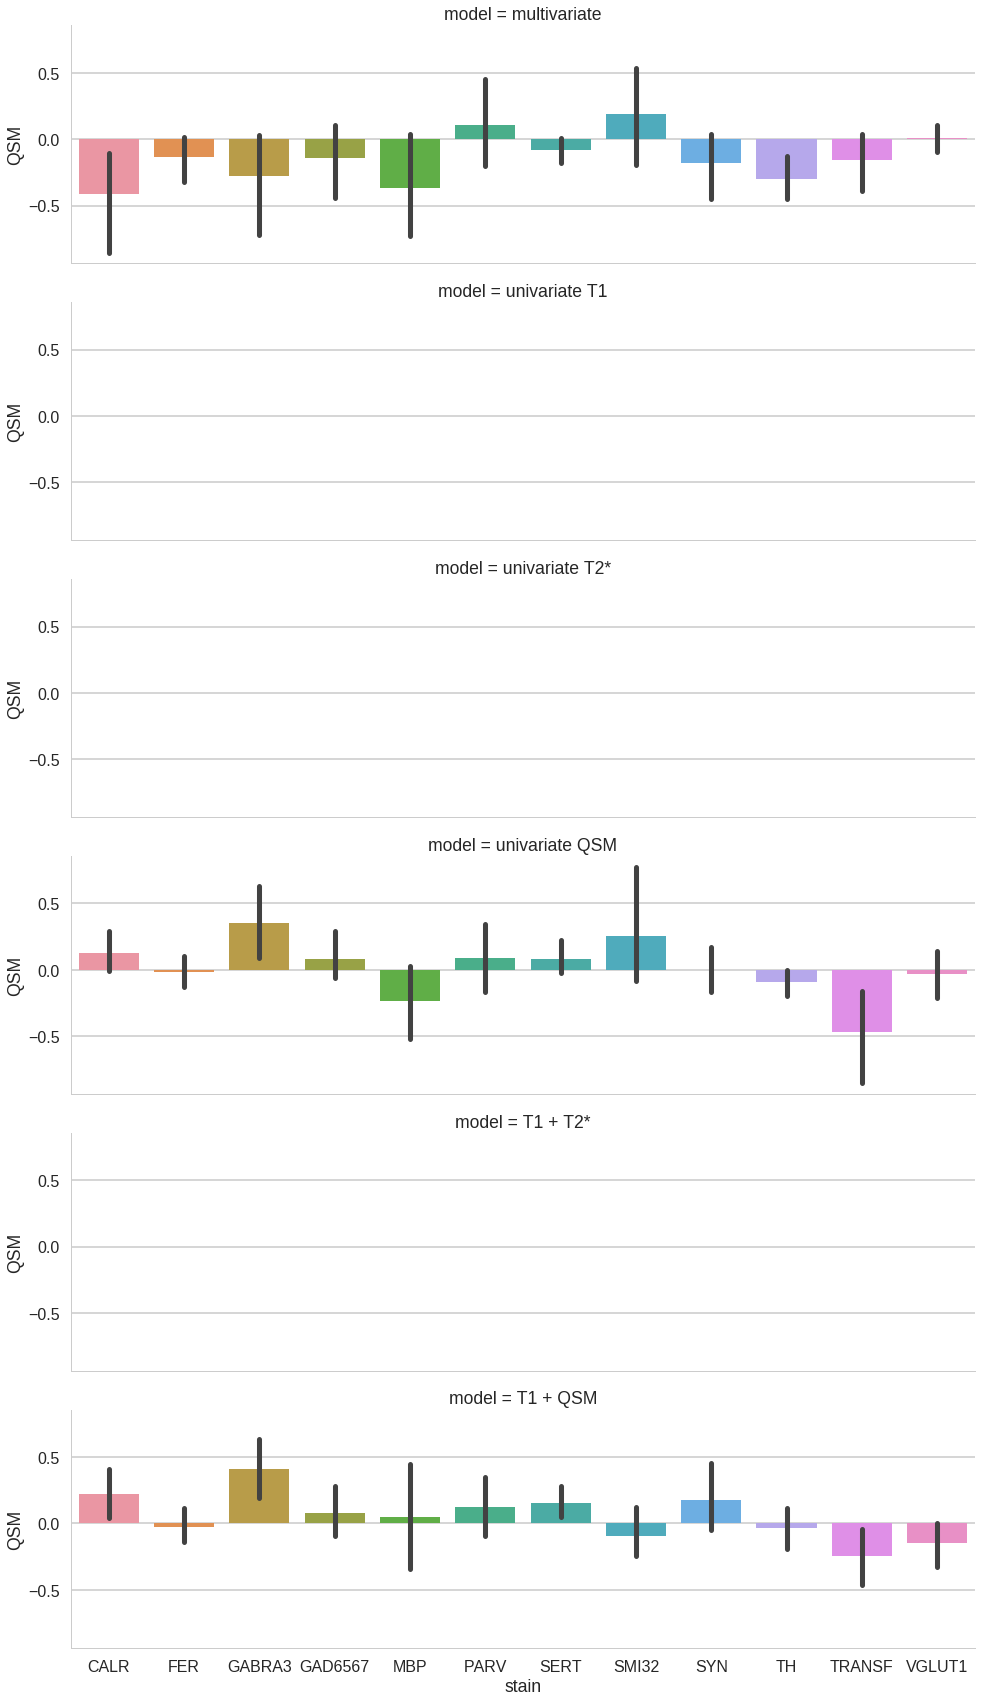

In [130]:
sns.factorplot('stain', 'QSM', data=df, row='model', kind='bar', aspect=3.5)

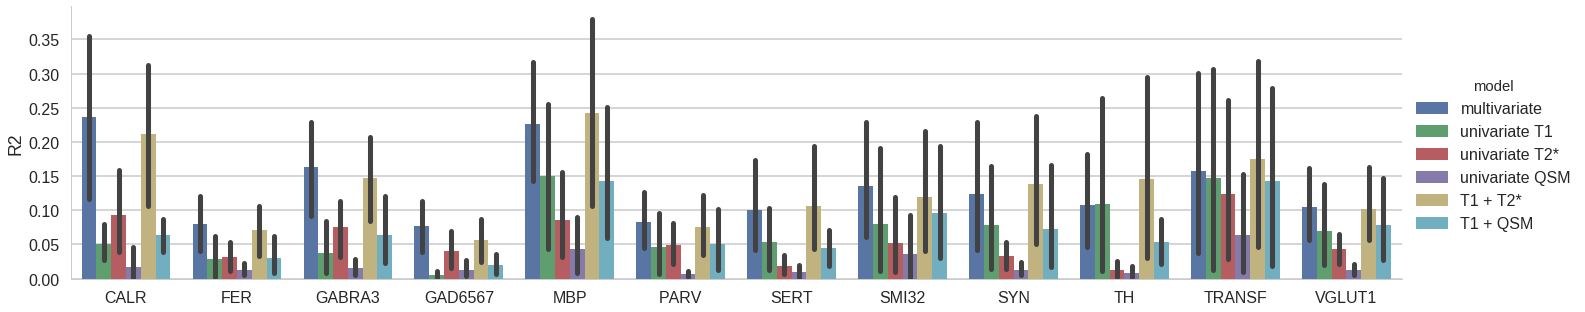

In [131]:
fac = sns.factorplot('stain', 'R2', 'model', df, kind='bar', aspect=4, size=5)

fac.set_xlabels('')

plt.savefig('/home/gdholla1/projects/post_mortem/reports/figures/R2_qmri.pdf')

In [132]:
mapper = dict(zip(df.stain.unique().tolist(), np.arange(12)))
df['row'] = df.stain.map(lambda x: mapper[x] / 6)

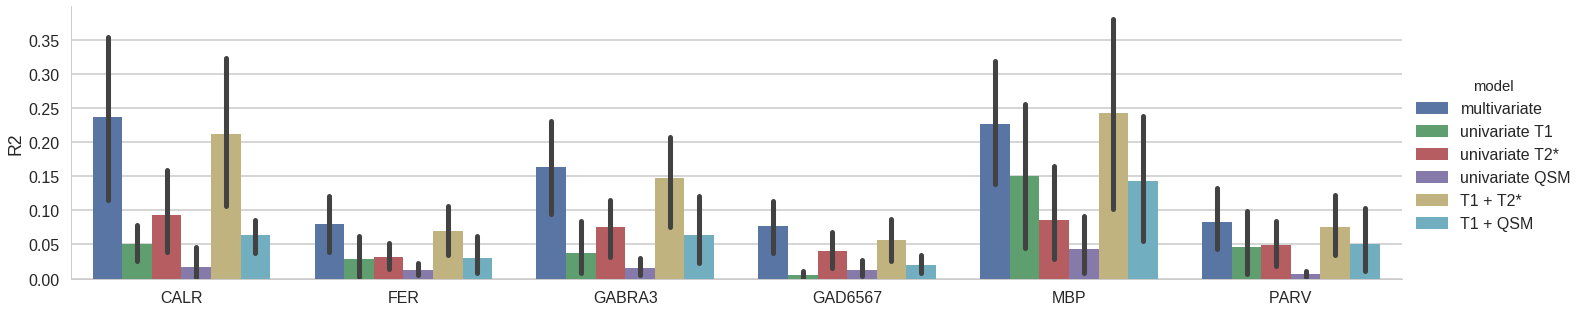

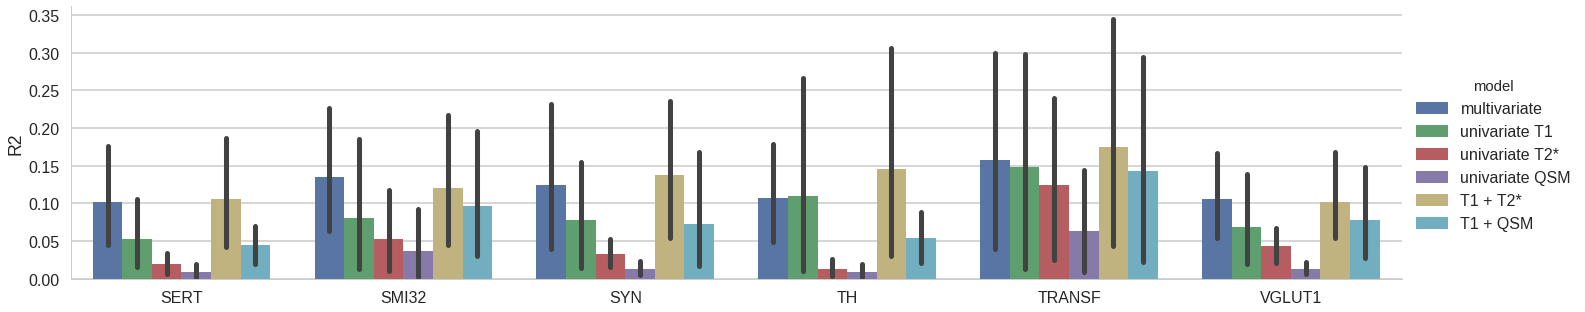

In [134]:
for row, d in df.groupby(['row']):
    plt.figure()
    fac = sns.factorplot('stain', 'R2', 'model', d, kind='bar', aspect=4, size=5)
    fac.set_xlabels('')
    plt.savefig('/home/gdholla1/projects/post_mortem/reports/figures/R2_qmri_%d.pdf' % row)

In [111]:
tmp = pandas.melt(df[df.model == 'multivariate'], id_vars=['subj_idx', 'stain', 'R2'], value_vars=['T1', 'T2*', 'QSM'])


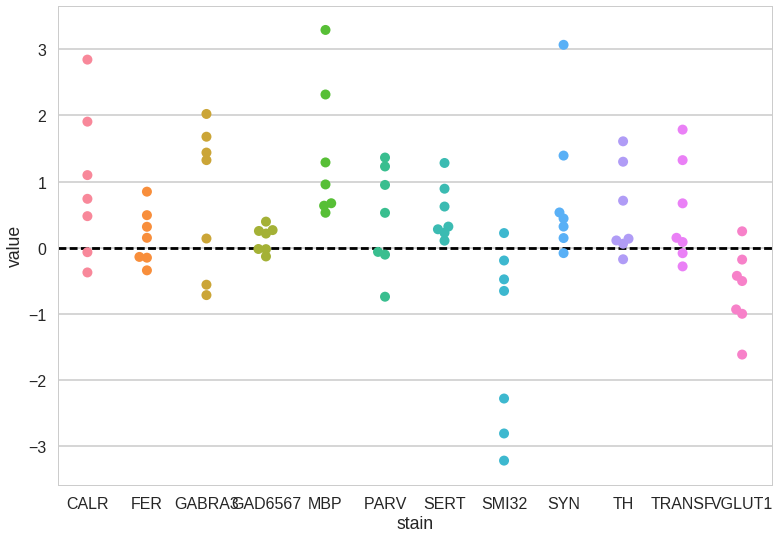

In [124]:
sns.swarmplot('stain', 'value', data=tmp[tmp.variable == 'T1'], s=10)
plt.axhline(0, c='k', ls='--')

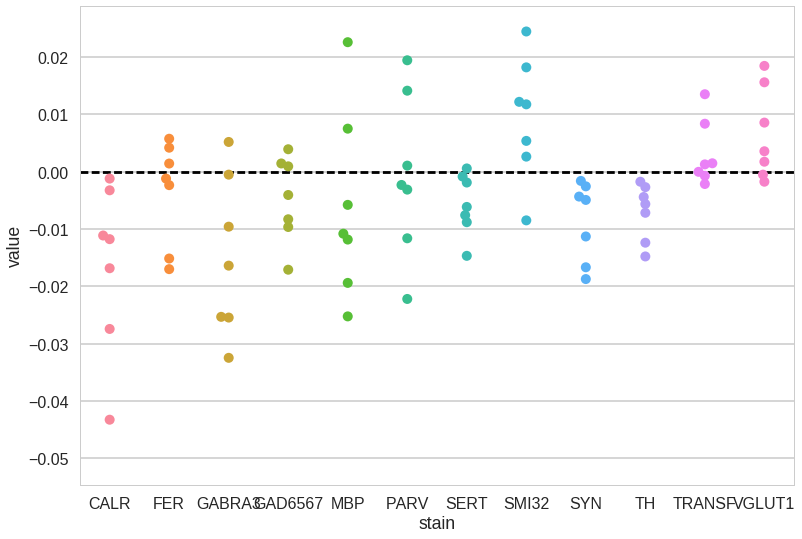

In [123]:
sns.swarmplot('stain', 'value', data=tmp[tmp.variable == 'T2*'], s=10)
plt.axhline(0, c='k', ls='--')

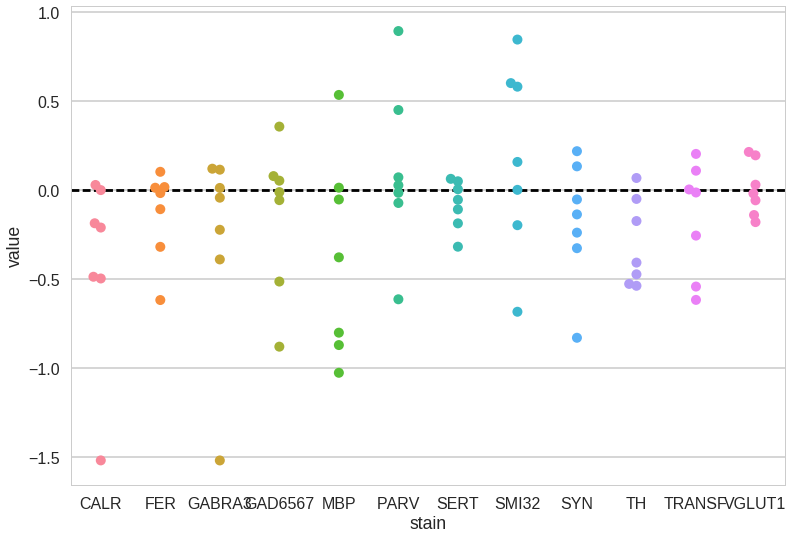

In [125]:
sns.swarmplot('stain', 'value', data=tmp[tmp.variable == 'QSM'], s=10)
plt.axhline(0, c='k', ls='--')

In [112]:
tmp

,subj_idx,stain,R2,variable,value
0,13095,CALR,0.321641,T1,0.477006
1,13095,FER,0.091770,T1,-0.150568
2,13095,GABRA3,0.282217,T1,2.020962
3,13095,GAD6567,0.106810,T1,0.213752
4,13095,MBP,0.222529,T1,1.288666
5,13095,PARV,0.097264,T1,-0.740187
6,13095,SERT,0.064752,T1,0.278728
7,13095,SMI32,0.086425,T1,-0.193012
8,13095,SYN,0.232457,T1,1.392146
9,13095,TH,0.079288,T1,0.135893


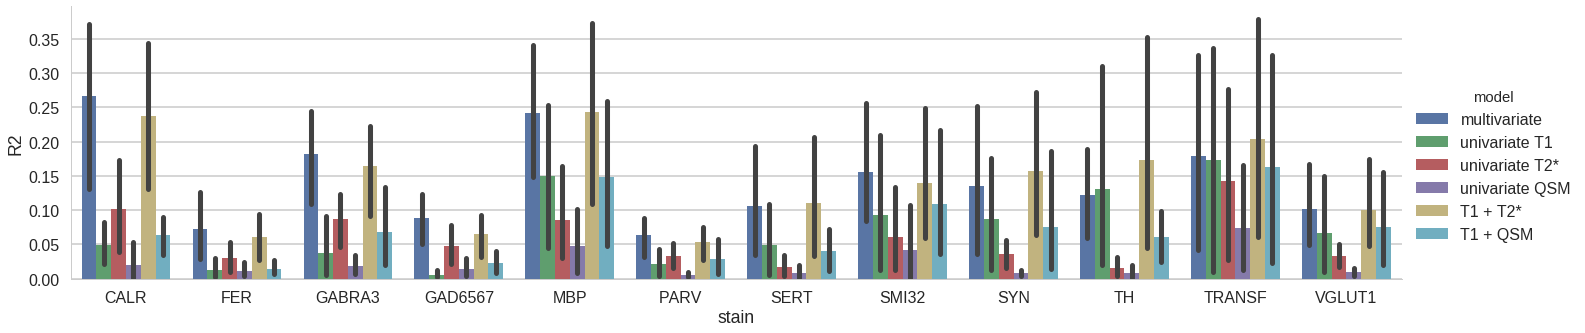

In [82]:
sns.factorplot('stain', 'R2', 'model', df[df.subj_idx != 14069], kind='bar', aspect=4, size=5)

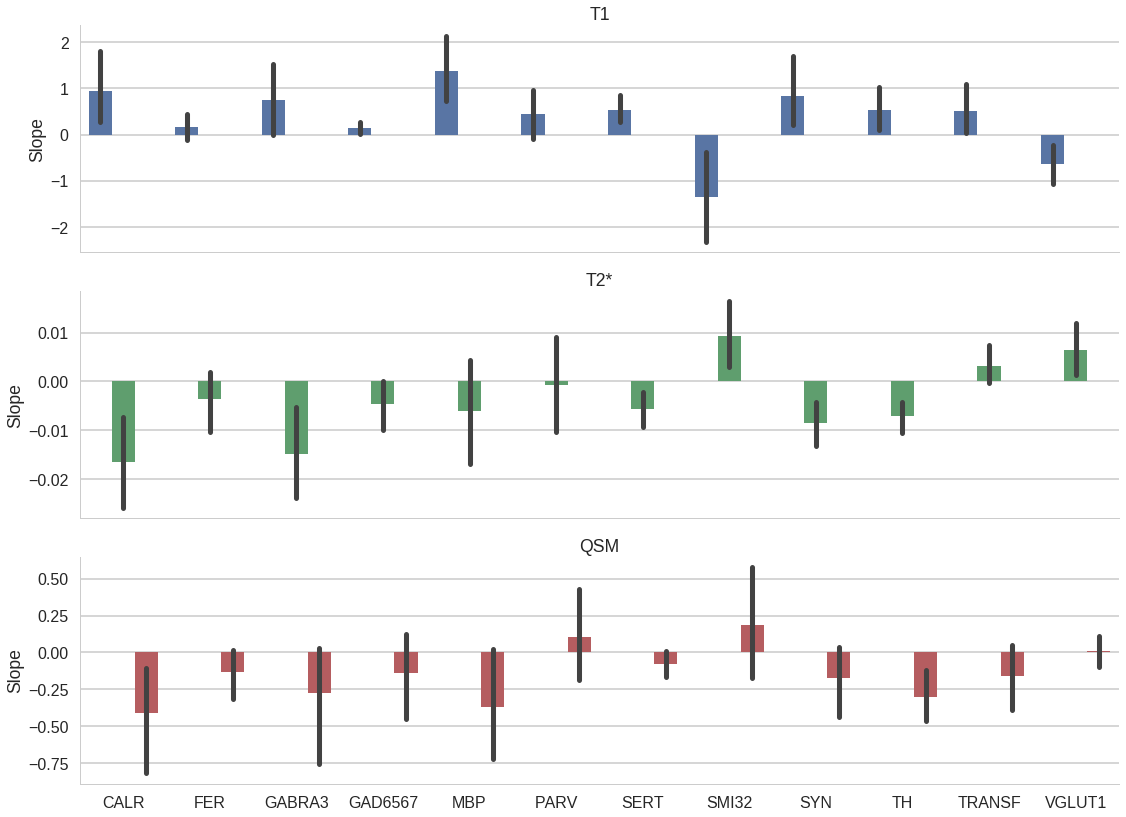

In [83]:
tmp = pandas.melt(df[df.model == 'multivariate'], id_vars=['subj_idx', 'stain', 'R2'], value_vars=['T1', 'T2*', 'QSM'])

tmp['Modality'] = tmp['variable']
tmp['Slope'] = tmp['value']
fac = sns.factorplot('stain', 'Slope', 'Modality', tmp, kind='bar', row='variable', sharey=False, aspect=4, legend=False)

fac.set_titles('{row_name}')
fac.set_xlabels('')
plt.savefig('/home/gdholla1/projects/post_mortem/reports/figures/qmri_slopes.pdf')

In [108]:
tmp = df.reset_index()
tmp = tmp[tmp.model == 'multivariate']
tmp.groupby(['stain']).agg([np.mean, np.std, lambda x: sp.stats.ttest_1samp(x, 0)[1]])[['const', 'QSM', 'T1', 'T2*', 'R2 adjusted']]

const                           QSM                            T1  \
             mean       std  <lambda>      mean       std  <lambda>      mean   
stain                                                                           
CALR     0.136744  0.207554  0.131940 -0.410386  0.532070  0.087363  0.945540   
FER      0.285658  0.279236  0.035265 -0.132379  0.253112  0.215715  0.167713   
GABRA3   0.387146  0.368629  0.032054 -0.275436  0.579395  0.255216  0.760482   
GAD6567  0.225845  0.281651  0.078118 -0.138922  0.417430  0.412457  0.136451   
MBP     -0.015684  0.322805  0.901916 -0.368921  0.568616  0.136870  1.383641   
PARV     0.264307  0.343837  0.088200  0.106438  0.468058  0.569425  0.451127   
SERT     0.173951  0.305571  0.182747 -0.078400  0.138069  0.183693  0.532002   
SMI32    0.674098  0.253505  0.000412  0.187311  0.533373  0.388669 -1.343316   
SYN      0.176210  0.317542  0.192437 -0.175990  0.347509  0.228793  0.830928   
TH       0.096334  0.292730  0.417397 -0.300274  0.246574  0.018093  0.535646   
TRANSF   0.208267  0.323487  0.139387 -0.158799  0.321048  0.238537  0.521371   
VGLUT1   0.570860  0.257460  0.001085  0.006622  0.153197  0.912678 -0.629101   

                                  T2*                     R2 adjusted  \
              std  <lambda>      mean       std  <lambda>        mean   
stain                                                                   
CALR     1.123127  0.067506 -0.016422  0.014698  0.025411    0.236971   
FER      0.417105  0.328336 -0.003489  0.009065  0.347754    0.080105   
GABRA3   1.118835  0.122233 -0.014945  0.013957  0.029841    0.162871   
GAD6567  0.193223  0.110927 -0.004700  0.007472  0.147105    0.076502   
MBP      1.040258  0.012532 -0.006152  0.016360  0.358221    0.226182   
PARV     0.783141  0.178326 -0.000675  0.014247  0.904362    0.082474   
SERT     0.424705  0.016121 -0.005638  0.005343  0.031505    0.101088   
SMI32    1.385706  0.042631  0.009428  0.010796  0.060218    0.135605   
SYN      1.088745  0.089996 -0.008602  0.006976  0.017204    0.124113   
TH       0.687305  0.084828 -0.006989  0.004902  0.009264    0.107048   
TRANSF   0.774483  0.125189  0.003092  0.005685  0.200155    0.157712   
VGLUT1   0.609355  0.034119  0.006508  0.007939  0.073188    0.105098   

                             
              std  <lambda>  
stain                        
CALR     0.169647  0.010140  
FER      0.062781  0.014934  
GABRA3   0.105048  0.006343  
GAD6567  0.055117  0.010426  
MBP      0.130974  0.003814  
PARV     0.062315  0.012800  
SERT     0.097793  0.033964  
SMI32    0.125776  0.029086  
SYN      0.142757  0.061082  
TH       0.094155  0.023760  
TRANSF   0.192833  0.073682  
VGLUT1   0.081408  0.014219

In [109]:
tmp = df.reset_index()
tmp = tmp[tmp.model == 'multivariate - no intercept']
tmp.groupby(['stain']).agg([np.mean, np.std, lambda x: sp.stats.ttest_1samp(x, 0)[1]])[['const', 'QSM', 'T1', 'T2*', 'R2 adjusted']]

const                    QSM                            T1            \
         mean std <lambda>      mean       std  <lambda>      mean       std   
stain                                                                          
CALR      NaN NaN      NaN -0.410386  0.532070  0.087363  0.945540  1.123127   
FER       NaN NaN      NaN -0.132379  0.253112  0.215715  0.167713  0.417105   
GABRA3    NaN NaN      NaN -0.275436  0.579395  0.255216  0.760482  1.118835   
GAD6567   NaN NaN      NaN -0.138922  0.417430  0.412457  0.136451  0.193223   
MBP       NaN NaN      NaN -0.368921  0.568616  0.136870  1.383641  1.040258   
PARV      NaN NaN      NaN  0.106438  0.468058  0.569425  0.451127  0.783141   
SERT      NaN NaN      NaN -0.078400  0.138069  0.183693  0.532002  0.424705   
SMI32     NaN NaN      NaN  0.187311  0.533373  0.388669 -1.343316  1.385706   
SYN       NaN NaN      NaN -0.175990  0.347509  0.228793  0.830928  1.088745   
TH        NaN NaN      NaN -0.300274  0.246574  0.018093  0.535646  0.687305   
TRANSF    NaN NaN      NaN -0.158799  0.321048  0.238537  0.521371  0.774483   
VGLUT1    NaN NaN      NaN  0.006622  0.153197  0.912678 -0.629101  0.609355   

                        T2*                     R2 adjusted            \
         <lambda>      mean       std  <lambda>        mean       std   
stain                                                                   
CALR     0.067506 -0.016422  0.014698  0.025411    0.236971  0.169647   
FER      0.328336 -0.003489  0.009065  0.347754    0.080105  0.062781   
GABRA3   0.122233 -0.014945  0.013957  0.029841    0.162871  0.105048   
GAD6567  0.110927 -0.004700  0.007472  0.147105    0.076502  0.055117   
MBP      0.012532 -0.006152  0.016360  0.358221    0.226182  0.130974   
PARV     0.178326 -0.000675  0.014247  0.904362    0.082474  0.062315   
SERT     0.016121 -0.005638  0.005343  0.031505    0.101088  0.097793   
SMI32    0.042631  0.009428  0.010796  0.060218    0.135605  0.125776   
SYN      0.089996 -0.008602  0.006976  0.017204    0.124113  0.142757   
TH       0.084828 -0.006989  0.004902  0.009264    0.107048  0.094155   
TRANSF   0.125189  0.003092  0.005685  0.200155    0.157712  0.192833   
VGLUT1   0.034119  0.006508  0.007939  0.073188    0.105098  0.081408   

                   
         <lambda>  
stain              
CALR     0.010140  
FER      0.014934  
GABRA3   0.006343  
GAD6567  0.010426  
MBP      0.003814  
PARV     0.012800  
SERT     0.033964  
SMI32    0.029086  
SYN      0.061082  
TH       0.023760  
TRANSF   0.073682  
VGLUT1   0.014219

In [85]:
tmp = df.reset_index()
tmp = tmp[tmp.model == 'multivariate']
tmp.groupby(['stain']).agg([np.mean, np.std, lambda x: sp.stats.ttest_1samp(x, 0)[1]])[['const', 'QSM', 'T1', 'T2*']]

const                           QSM                            T1  \
             mean       std  <lambda>      mean       std  <lambda>      mean   
stain                                                                           
CALR     0.136744  0.207554  0.131940 -0.410386  0.532070  0.087363  0.945540   
FER      0.285658  0.279236  0.035265 -0.132379  0.253112  0.215715  0.167713   
GABRA3   0.387146  0.368629  0.032054 -0.275436  0.579395  0.255216  0.760482   
GAD6567  0.225845  0.281651  0.078118 -0.138922  0.417430  0.412457  0.136451   
MBP     -0.015684  0.322805  0.901916 -0.368921  0.568616  0.136870  1.383641   
PARV     0.264307  0.343837  0.088200  0.106438  0.468058  0.569425  0.451127   
SERT     0.173951  0.305571  0.182747 -0.078400  0.138069  0.183693  0.532002   
SMI32    0.674098  0.253505  0.000412  0.187311  0.533373  0.388669 -1.343316   
SYN      0.176210  0.317542  0.192437 -0.175990  0.347509  0.228793  0.830928   
TH       0.096334  0.292730  0.417397 -0.300274  0.246574  0.018093  0.535646   
TRANSF   0.208267  0.323487  0.139387 -0.158799  0.321048  0.238537  0.521371   
VGLUT1   0.570860  0.257460  0.001085  0.006622  0.153197  0.912678 -0.629101   

                                  T2*                      
              std  <lambda>      mean       std  <lambda>  
stain                                                      
CALR     1.123127  0.067506 -0.016422  0.014698  0.025411  
FER      0.417105  0.328336 -0.003489  0.009065  0.347754  
GABRA3   1.118835  0.122233 -0.014945  0.013957  0.029841  
GAD6567  0.193223  0.110927 -0.004700  0.007472  0.147105  
MBP      1.040258  0.012532 -0.006152  0.016360  0.358221  
PARV     0.783141  0.178326 -0.000675  0.014247  0.904362  
SERT     0.424705  0.016121 -0.005638  0.005343  0.031505  
SMI32    1.385706  0.042631  0.009428  0.010796  0.060218  
SYN      1.088745  0.089996 -0.008602  0.006976  0.017204  
TH       0.687305  0.084828 -0.006989  0.004902  0.009264  
TRANSF   0.774483  0.125189  0.003092  0.005685  0.200155  
VGLUT1   0.609355  0.034119  0.006508  0.007939  0.073188

In [464]:
tmp['value'] = tmp.groupby(['stain', 'variable']).value.transform(lambda d: (d)/d.std())

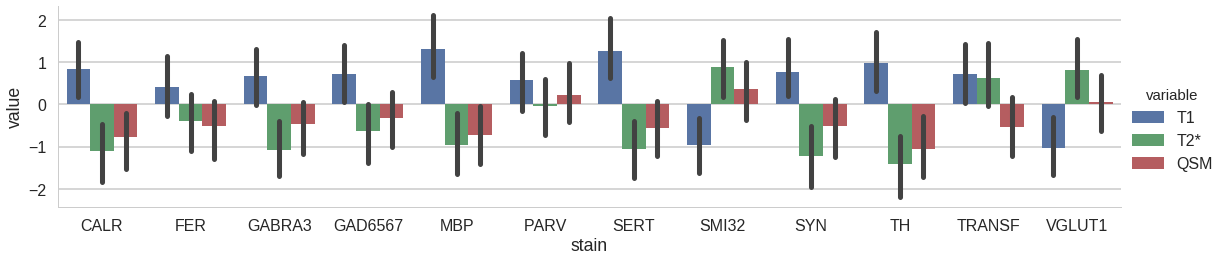

In [465]:
sns.factorplot('stain', 'value', 'variable', tmp, kind='bar', aspect=4)

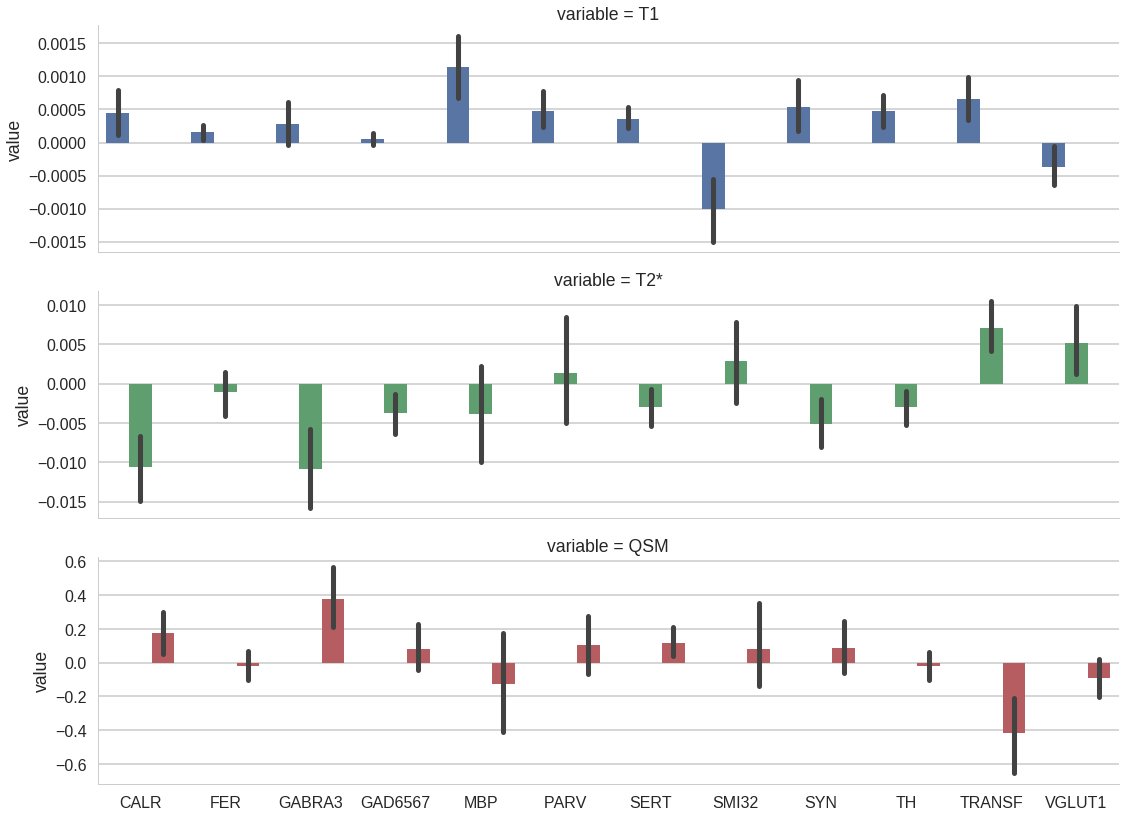

In [486]:
tmp = pandas.melt(df[df.model != 'multivariate'], id_vars=['subj_idx', 'stain', 'R2'], value_vars=['T1', 'T2*', 'QSM'])
# tmp['value'] = tmp.groupby(['stain', 'variable']).value.transform(lambda d: (d)/d.std())
fac = sns.factorplot('stain', 'value', 'variable', tmp, kind='bar', row='variable', sharey=False, aspect=4)
fac.set_xlabels('')

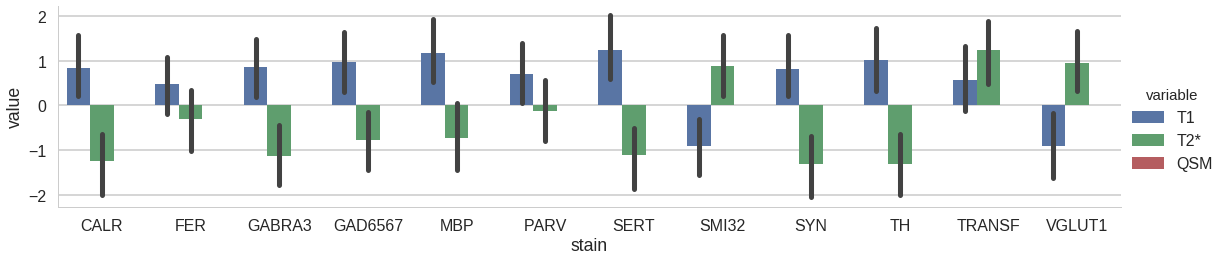

In [467]:
tmp = pandas.melt(df[df.model == 'T1 + T2*'], id_vars=['subj_idx', 'stain', 'R2'], value_vars=['T1', 'T2*', 'QSM'])
tmp['value'] = tmp.groupby(['stain', 'variable']).value.transform(lambda d: (d)/d.std())
sns.factorplot('stain', 'value', 'variable', tmp, kind='bar', aspect=4)

In [10]:
df = df.set_index(['subj_idx', 'model', 'stain'])

In [11]:
test = np.zeros(ds.smoothed_data.shape[:3])

In [12]:
ds.smoothed_dataframe.corr()

,CALR,FER,GABRA3,GAD6567,MBP,PARV,SERT,SMI32,SYN,TH,TRANSF,VGLUT1,T1,R1,T2*,R2*,QSM
CALR,1.000000,0.473981,0.117136,0.313081,0.616317,-0.040226,0.517358,-0.197897,0.352140,0.349116,-0.338145,-0.065661,0.351996,-0.372937,-0.349919,0.398761,-0.014191
FER,0.473981,1.000000,-0.107142,0.139742,0.475667,0.001402,0.232170,0.079711,0.188622,0.327575,-0.331258,-0.096711,0.238955,-0.189292,-0.132592,0.159291,-0.053037
GABRA3,0.117136,-0.107142,1.000000,0.295139,-0.065013,0.134963,0.142930,-0.188967,0.228531,-0.043792,-0.153181,0.037786,-0.146310,0.171355,-0.351567,0.322605,0.146338
GAD6567,0.313081,0.139742,0.295139,1.000000,0.184428,0.019895,0.197252,-0.067179,0.337915,0.130431,-0.089911,0.158920,0.017585,-0.011331,-0.259512,0.259144,-0.029456
MBP,0.616317,0.475667,-0.065013,0.184428,1.000000,0.088710,0.485416,0.057778,0.374998,0.636934,-0.306854,0.007937,0.570030,-0.565631,-0.135032,0.171690,-0.155170
PARV,-0.040226,0.001402,0.134963,0.019895,0.088710,1.000000,-0.149876,0.346937,0.055906,0.082992,0.286027,0.203355,-0.078753,0.068739,-0.186393,0.201060,0.108252
SERT,0.517358,0.232170,0.142930,0.197252,0.485416,-0.149876,1.000000,-0.259879,0.297597,0.453569,-0.348570,-0.215510,0.435073,-0.438357,-0.148828,0.151398,-0.084451
SMI32,-0.197897,0.079711,-0.188967,-0.067179,0.057778,0.346937,-0.259879,1.000000,0.023138,0.174447,0.331430,0.285553,0.047543,-0.012656,0.123380,-0.118552,0.020795
SYN,0.352140,0.188622,0.228531,0.337915,0.374998,0.055906,0.297597,0.023138,1.000000,0.419303,-0.041978,-0.119030,0.434319,-0.403701,0.071911,-0.077475,-0.140780
TH,0.349116,0.327575,-0.043792,0.130431,0.636934,0.082992,0.453569,0.174447,0.419303,1.000000,-0.078160,-0.063597,0.690926,-0.589964,0.143729,-0.115365,-0.212539


In [134]:
test[ds.thresholded_mask] = df.ix[15055, 'bivariate', 'CALR']['T2*'].iloc[0] * ds.smoothed_dataframe['T2*'] + df.ix[15055, 'bivariate', 'CALR']['T1'].iloc[0] * ds.smoothed_dataframe['T1']

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':


In [173]:
df

,QSM,R2,T1,T2*,const,model,stain,subj_idx
0,-0.209460,0.322767,0.000478,-0.011132,0.093796,multivariate,CALR,13095
1,NaN,0.017073,-0.000193,NaN,0.115934,univariate,CALR,13095
2,0.557022,0.104942,NaN,NaN,0.026138,univariate,CALR,13095
3,0.015261,0.090204,-0.000159,0.004166,0.112118,multivariate,FER,13095
4,NaN,0.007581,0.000102,NaN,0.097672,univariate,FER,13095
5,-0.275987,0.040689,NaN,NaN,0.144530,univariate,FER,13095
6,-1.518597,0.281440,0.002025,-0.032475,0.254739,multivariate,GABRA3,13095
7,NaN,0.003092,0.000217,NaN,0.230739,univariate,GABRA3,13095
8,0.575744,0.016004,NaN,NaN,0.284861,univariate,GABRA3,13095
9,0.058585,0.112062,0.000186,-0.008319,0.233632,multivariate,GAD6567,13095


# PCA sectors

In [254]:
from sklearn.decomposition import PCA
from matplotlib.backends.backend_pdf import PdfPages

import os


In [255]:
import pandas
from pystain import StainDataset
subject_id = 15035

ds = StainDataset(subject_id)

subject_ids = [13095, 14037, 14051, 14069, 15033, 15035, 15055]
conversion_matrix = np.array([[0, 0, ds.xy_resolution],
                      [-ds.z_resolution, 0, 0],
                      [0, -ds.xy_resolution, 0]])


/home/gdholla1/data/post_mortem/new_data_format/15035/images.hdf5


In [292]:
ds.smoothed_dataframe[np.isfinite(ds.smoothed_dataframe['QSM'])].shape

(743012, 17)

In [397]:
results = []

for subject_id in subject_ids[:]:


    ds = StainDataset(subject_id, fwhm=0.3)
    
    ds.smoothed_dataframe['T1'] = ds.h5file['T1_in_stain_space'][ds.thresholded_mask]
    ds.smoothed_dataframe['R1'] = 1./ds.h5file['T1_in_stain_space'][ds.thresholded_mask]
    
    ds.smoothed_dataframe['T2*'] = ds.h5file['T2star_in_stain_space'][ds.thresholded_mask]
    ds.smoothed_dataframe['R2*'] = 1./ds.h5file['T2star_in_stain_space'][ds.thresholded_mask]        
    
    ds.smoothed_dataframe['QSM'] = ds.h5file['QSM_in_stain_space'][ds.thresholded_mask]            
    
    idx = (ds.smoothed_dataframe['QSM'] != 0)
    
    
    # Get coordinates of mask and bring them to mm
    x, y, z = np.where(ds.thresholded_mask)
    coords = np.column_stack((x, y, z))

    coords_mm = conversion_matrix.dot(coords.T).T
    coords_mm -= coords_mm.mean(0)
    
    
    # Fit two components and make sure first axis walks dorsal
    # and second component lateral
    pca = PCA()
    pca.fit_transform((coords_mm - coords_mm.mean(0))[:, (0, 2)])

    components = pca.components_
    print components

    if components[0, 1] < 0:
        components[0] = -components[0]

    if components[1, 0] < 0:
        components[1] = -components[1]
        
#     print components
        
    coords_dataframe = pandas.DataFrame(coords_mm, columns=['x_mm', 'y_mm', 'z_mm'])
    coords_dataframe['slice'] = x

    coords_dataframe['pc1'] = components.dot(coords_mm[:, (0, 2)].T)[0, :]
    coords_dataframe['pc2'] = components.dot(coords_mm[:, (0, 2)].T)[1, :]

    coords_dataframe[['pc1_slice_center', 'pc2_slice_center']] = coords_dataframe.groupby(['slice'])[['pc1', 'pc2']].apply(lambda x: x - x.mean())
    
    coords_dataframe['slice_3'] = pandas.qcut(coords_dataframe.y_mm, 3, labels=['posterior', 'middle', 'anterior'])    

    coords_dataframe['pc1_3'] = coords_dataframe.groupby('slice_3').pc1.apply(lambda d: pandas.qcut(d, 3, labels=['ventral', 'middle', 'dorsal']))
    coords_dataframe['pc2_3'] = coords_dataframe.groupby(['slice_3', 'pc1_3']).pc2.apply(lambda d: pandas.qcut(d, 3, labels=['medial', 'middle', 'lateral']))

    
    df= pandas.concat((ds.smoothed_dataframe, coords_dataframe), 1)
    
    print df.shape
    df = df.ix[idx]
    print df.shape
    
    tmp = df.pivot_table(index=['pc1_3', 'pc2_3', 'slice_3'], values=ds.stains + ['T1', 'T2*', 'QSM'], aggfunc='median').copy()
    tmp['subject_id'] = subject_id
    
#     print tmp
    
    results.append(tmp.copy())

/home/gdholla1/data/post_mortem/new_data_format/13095/images.hdf5
[[-0.97056185 -0.24085203]
 [-0.24085203  0.97056185]]
(748008, 28)
(743012, 28)
/home/gdholla1/data/post_mortem/new_data_format/14037/images.hdf5
[[-0.95649419 -0.29175138]
 [ 0.29175138 -0.95649419]]
(813151, 28)
(813151, 28)
/home/gdholla1/data/post_mortem/new_data_format/14051/images.hdf5
[[-0.78933812 -0.61395874]
 [ 0.61395874 -0.78933812]]
(947622, 28)
(947622, 28)
/home/gdholla1/data/post_mortem/new_data_format/14069/images.hdf5
[[-0.70764237 -0.70657079]
 [ 0.70657079 -0.70764237]]
(910298, 28)
(905981, 28)
/home/gdholla1/data/post_mortem/new_data_format/15033/images.hdf5
[[-0.66358108 -0.74810437]
 [ 0.74810437 -0.66358108]]
(996383, 28)
(996383, 28)
/home/gdholla1/data/post_mortem/new_data_format/15035/images.hdf5
[[-0.61137631 -0.79134   ]
 [-0.79134     0.61137631]]
(1131680, 28)
(1131680, 28)
/home/gdholla1/data/post_mortem/new_data_format/15055/images.hdf5
[[-0.77494798 -0.63202503]
 [-0.63202503  0.774947

In [398]:
df = pandas.concat(results).reset_index().set_index(['subject_id', 'slice_3', 'pc1_3', 'pc2_3'])
df = pandas.melt(df.reset_index(), id_vars=['subject_id', 'slice_3', 'pc1_3', 'pc2_3'], var_name='stain')
df['value'] = df.groupby(['subject_id', 'stain']).transform(lambda x: (x - x.mean()) / x.std())

In [399]:
def plot_ellipse_values(values, ellipse_pars=None, size=(1000, 1000), vmin=None, vmax=None, cmap=plt.cm.coolwarm, **kwargs):

    ''' values is a n-by-m array'''
    

    if ellipse_pars is None:
        a = 350
        b = 150
        x = 500
        y= 500

        theta = 45. / 180 * np.pi

    else:
        a, b, x, y, theta = ellipse_pars

    A = a**2 * (np.sin(theta))**2 + b**2 * (np.cos(theta))**2
    B = 2 * (b**2 - a**2) * np.sin(theta) * np.cos(theta)
    C = a**2 * np.cos(theta)**2 + b**2 * np.sin(theta)**2
    D = -2 * A * x - B* y
    E = -B * x - 2 * C * y
    F = A* x**2 + B*x*y + C*y**2 - a**2*b**2


    X,Y = np.meshgrid(np.arange(size[0]), np.arange(size[1]))

    in_ellipse = A*X**2 + B*X*Y +C*Y**2 + D*X + E*Y +F < 0


    pc1 = np.array([[np.cos(theta)], [np.sin(theta)]])
    pc2 = np.array([[np.cos(theta - np.pi/2.)], [np.sin(theta - np.pi/2.)]])

    pc1_distance = pc1.T.dot(np.array([(X - x).ravel(), (Y - y).ravel()])).reshape(X.shape)
    pc2_distance = pc2.T.dot(np.array([(X - x).ravel(), (Y - y).ravel()])).reshape(X.shape)

    pc1_quantile = np.floor((pc1_distance / a + 1 ) / 2. * values.shape[0])
    pc2_quantile = np.floor((pc2_distance / b + 1 ) / 2. * values.shape[1])

    im = np.zeros_like(X, dtype=float)

    for pc1_q in np.arange(values.shape[0]):
        for pc2_q in np.arange(values.shape[1]):
            im[in_ellipse * (pc1_quantile == pc1_q) & (pc2_quantile == pc2_q)] = values[pc1_q, pc2_q]


    # im[in_ellipse * (pc1_distance < 0) & (pc2_distance < 0)] = lower_left
    # im[in_ellipse * (pc1_distance < 0) & (pc2_distance > 0)] = lower_right

    im = np.ma.masked_array(im, ~in_ellipse)
    cax = plt.imshow(im, origin='lower', cmap=cmap, vmin=vmin, vmax=vmax, **kwargs)
    plt.grid('off')
    sns.despine()
    
    return cax

In [400]:
from statsmodels.sandbox.stats import multicomp
from matplotlib import patches

sns.set_style('white')
df.stain.unique()

array(['CALR', 'FER', 'GABRA3', 'GAD6567', 'MBP', 'PARV', 'QSM', 'SERT',
       'SMI32', 'SYN', 'T1', 'T2*', 'TH', 'TRANSF', 'VGLUT1'], dtype=object)

In [401]:
(ds.smoothed_dataframe.values < -1000).mean()

0.0

In [402]:
np.percentile(ds.smoothed_dataframe.QSM, np.arange(0, 100, 5))

array([-0.12451924, -0.03282444, -0.01939206, -0.01076531, -0.00393794,
        0.        ,  0.        ,  0.00112137,  0.00634711,  0.01100626,
        0.01529047,  0.01942635,  0.02344253,  0.02755832,  0.0318583 ,
        0.03643147,  0.04141158,  0.04719577,  0.05442875,  0.06623166])

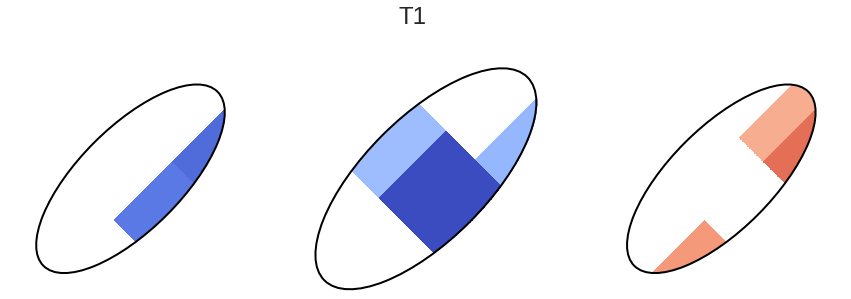

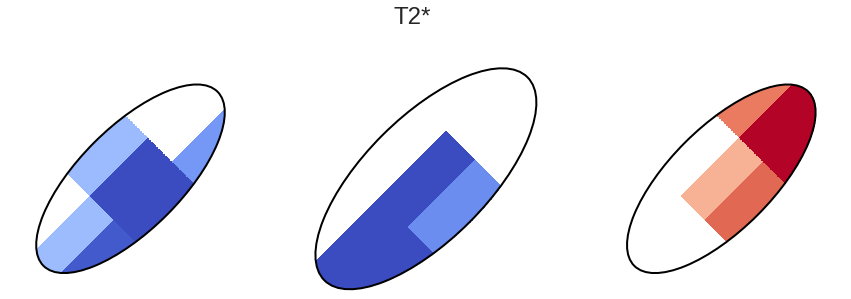

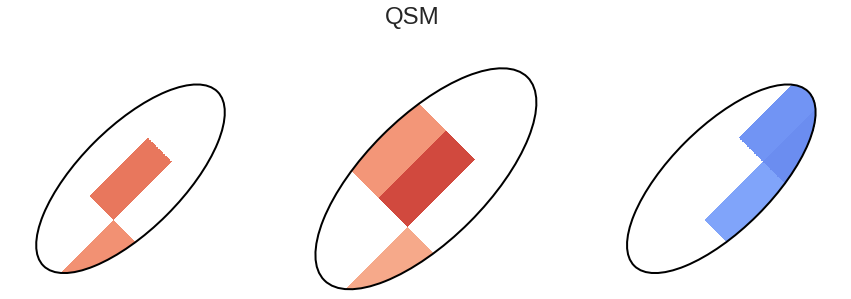

In [405]:
for stain in ['T1', 'T2*', 'QSM']:
    
    d = df[(df.stain == stain) & (df.subject_id != 14069)]
    
    fn = '/home/gdholla1/projects/post_mortem/reports/PCA_sectors/{stain}_big_picture_coolwarm.pdf'.format(**locals())
    pdf = PdfPages(fn)
    
    fig, axes = plt.subplots(nrows=1, ncols=3)
    
    for i, (slice, d2) in enumerate(d.groupby('slice_3')):
    
        ax = plt.subplot(1, 3, ['anterior', 'middle', 'posterior'].index(slice) + 1)
        
        n = d2.groupby(['pc1_3', 'pc2_3']).value.apply(lambda v: len(v)).unstack(1).ix[['ventral', 'middle', 'dorsal'], ['medial', 'middle', 'lateral']]
        t = d2.groupby(['pc1_3', 'pc2_3']).value.apply(lambda v: sp.stats.ttest_1samp(v, 0)[0]).unstack(1).ix[['ventral', 'middle', 'dorsal'], ['medial', 'middle', 'lateral']]
        p = d2.groupby(['pc1_3', 'pc2_3']).value.apply(lambda v: sp.stats.ttest_1samp(v, 0)[1]).unstack(1).ix[['ventral', 'middle', 'dorsal'], ['medial', 'middle', 'lateral']]
        mean = d2.groupby(['pc1_3', 'pc2_3']).value.mean().unstack(1).ix[['ventral', 'middle', 'dorsal'], ['medial', 'middle', 'lateral']]
        
        # FDR
#         p.values[:] = multicomp.fdrcorrection0(p.values.ravel())[1].reshape(3, 3)
        
        if i == 1:
            a, b, x, y, theta  = 350, 150, 300, 275, 45
        else:
            a, b, x, y, theta  = 300, 125, 300, 275, 45.

        plot_ellipse_values(t[p<0.05].values, size=(600, 550), ellipse_pars=(a, b, x, y,  theta / 180. * np.pi), vmin=-7, vmax=7, cmap=plt.cm.coolwarm)
#         plot_ellipse_values(t.values, size=(600, 550), ellipse_pars=(a, b, x, y,  theta / 180. * np.pi), vmin=-7, vmax=7, cmap=plt.cm.coolwarm)


        e1 = patches.Ellipse((x, y), a*2, b*2,
                         angle=theta, linewidth=2, fill=False, zorder=2)

        ax.add_patch(e1)

        plt.xticks([])
        plt.yticks([])    

        sns.despine(bottom=True, left=True)



        sns.despine(bottom=True, left=True)

    plt.suptitle(stain, fontsize=24)
    fig.set_size_inches(15., 5.)
    pdf.savefig(fig, transparent=True)    
    pdf.close()

In [395]:
t

pc2_3,medial,middle,lateral
pc1_3,,,
ventral,1.728271,-0.691220,1.000177
middle,1.008489,-0.878764,-3.938166
dorsal,-1.884522,-4.509660,-4.712504


In [ ]:
sns.heatmap(df.pivot_table(index=['subject_id', 'pc1_3', 'pc2_3'], columns='stain', values='value').corr())

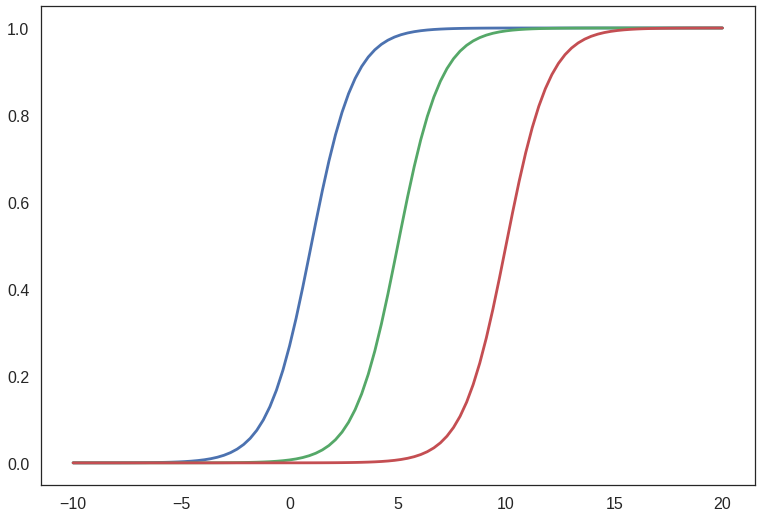

In [420]:
a = np.linspace(-10, 20, 100)
b = 1
A = 1

for b in [1, 5, 10]:
    plt.plot(a, A * np.exp(a) / (np.exp(a) + np.exp(b)) -A/2)

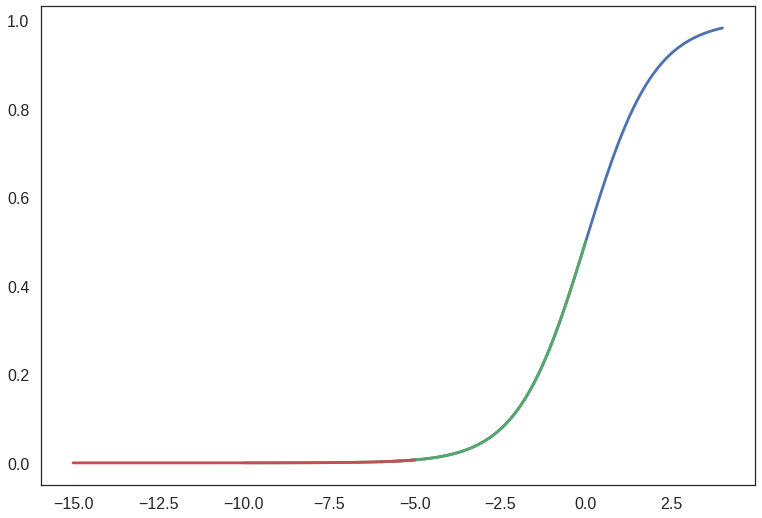

In [414]:
a = np.linspace(-5, 5, 100)
b = 5
A = 1
B=1

for b in [1, 5, 10]:
    x =  a- b
    plt.plot(x, A/(1 + np.exp(-B * x)) - (A/2))